# Recap from Lecture 3

let's try to print a variable "print(a)"

In [ ]:
print(a)

**<font color='blue'>question:</font>** why we got an error? let's try again after we figured out the issue

In [ ]:
a='hello'
print(a)

remember you need always to run the cell where you define something before using the definition. this is also true when you import a package or define a function, a variable, an array, a list ecc

### Matplotlib and magic functions

In [ ]:
# pylab is a nice interface to all that is matplotlib
import matplotlib.pyplot as plt
import numpy as np

# plots to appear in the notebook:
%matplotlib inline

### Basic plotting

**<font color='blue'>Exercise:</font>** Try to plot y vs. x and add labels to x-axis and y-axis

In [ ]:
x = np.linspace(0, 2*np.pi, 20)
print(x)

In [ ]:
y = np.sin(x)
print(y)

In [ ]:
plt.plot(?, ?)
plt.xlabel(?)
plt.ylabel(?)

### Plotting Styles

Line Plots

<code> '-'             solid line style
 '--'            dashed line style
 '-.'            dash-dot line style
 ':'             dotted line style
 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'</code>

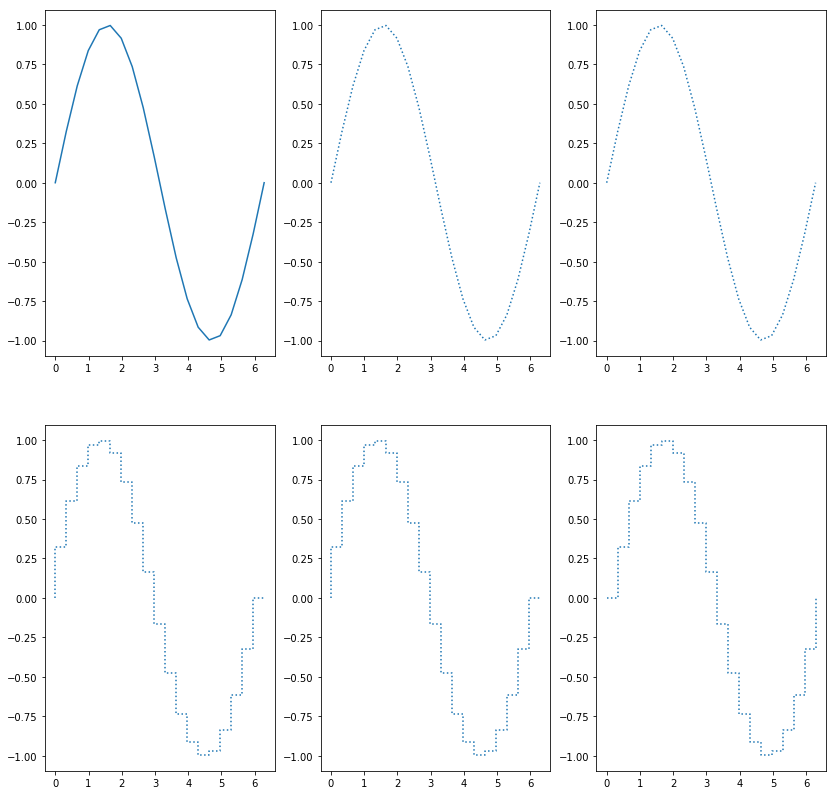

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 14))
# plt.plot?
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y, ':')
ax[0, 2].plot(x, y, linestyle=':')
ax[1, 0].plot(x, y, linestyle=':', drawstyle ='steps')
ax[1, 1].plot(x, y, linestyle=':', drawstyle ='steps-pre')
ax[1, 2].plot(x, y, linestyle=':', drawstyle ='steps-post')

### Other plotting styles

#### Scatter
Plots the points without connecting them.

<code>``'.'``             point marker
 ``','``             pixel marker
 ``'o'``             circle marker
 ``'*'``             star marker
 ``'x'``             x marker
 ``'D'``             diamond marker
 ``'d'``             thin_diamond marker
</code>

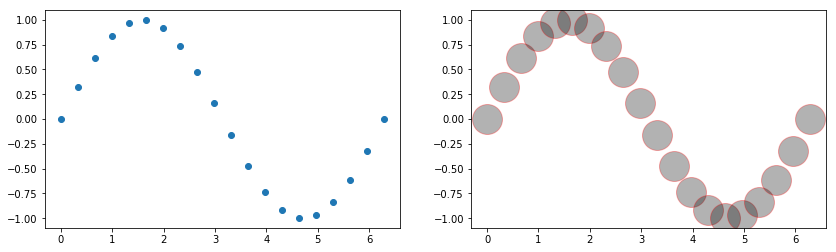

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].plot(x, y, 'o')
ax[1].plot(x, y, 'o', ms=30, mec='red', color='black', alpha=0.3) #ms: markersize; mec: markeredgecolor

**<font color='blue'>Exercise:</font>** make a scatter plot with your favorite style and color

Text(0, 0.5, 'sin(x)')

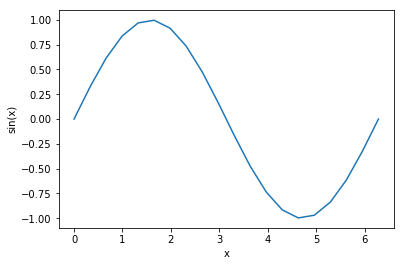

In [6]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')

### Error bars
Can plot the error of each individual point in both x and y direction

<ErrorbarContainer object of 3 artists>

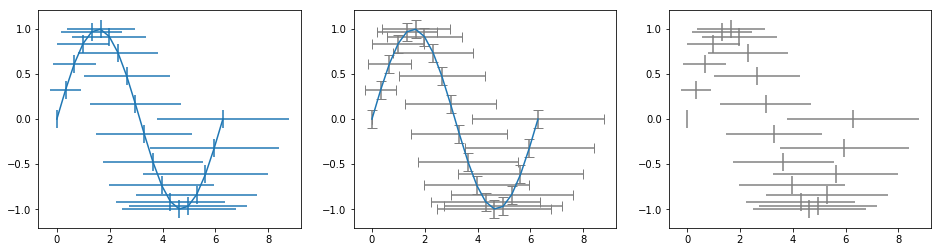

In [7]:
xerr = np.sqrt(x)
yerr = 0.1

fig, ax = plt.subplots(ncols=3, figsize=(16, 4))

ax[0].errorbar(x, y, xerr=xerr, yerr=yerr)
# add error caps, color the error bars differently than the data:
ax[1].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=5, ecolor='gray')
# don't plot values? Just error bars? set fmt='none'
ax[2].errorbar(x, y, xerr=xerr, yerr=yerr, capsize=0, ecolor='gray', fmt='none')

### Histogram
let's now define a varialbe with random values (we will use the function x = np.random.normal(size=???) where instead of ??? you need the number of random values you want.
let's also define a second variable that is just the counts of all these measuremts we have 
y = np.arange(0, len(x)). <br>

In [8]:
#Example: 
random_values = np.random.normal(size=100)
counter = np.arange(0, len(random_values))
print(len(random_values))
print(len(counter))

100
100


Both *np.linspace* and *np.arange* can give you evenly spaced numbers over a specified interval.  

Difference between them:
* **<font color='blue'>np.linspace(start, stop, num)</font>**  num: Number of samples to generate
* **<font color='blue'>np.arange(start, stop, step)</font>**  step: Spacing between values

Let's take a look how these variable looks like by plotting the counter and the random values

In [ ]:
fig, ax = plt.subplots()
ax.plot(counter, random_values, 'ob')
ax.set_xlabel('counter')
ax.set_ylabel('random value')

### Histogram
plotting the mesurments we have in this way is not usually very useful. It is better to use histograms to see how all the measurments distribute. <br>
**Histogram defines a series of bins and count how many points are in each bin**

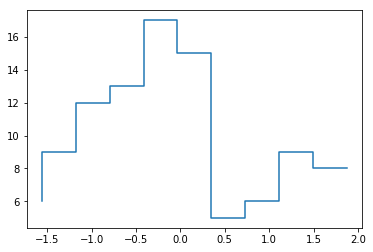

In [10]:
fig, ax = plt.subplots()
h, bins = np.histogram(random_values, bins=10)
ax.plot(bins[1:], h,  linestyle='-', drawstyle ='steps-pre')
plt.draw()

A more convenient function: **plt.hist**

Difference between *np.histogram* and *plt.hist*:

*np.histogram* just calculates the counts. *plt.hist* can calculate and plot them

In [ ]:
hist = plt.hist(random_values, bins=10)

# how to plot an astronomical image and how to detect object in the image

<br> Let's import the packages we will use today: **[sep](https://sep.readthedocs.io/en/v1.1.x/)**, **[astropy](https://docs.astropy.org/en/stable/index.html)**  
<br> from **astropy** we will import: **fits** and **wcs**

In [ ]:
from astropy.io import fits
from astropy import wcs as wcs
import sep

# read an image
**16335757.fits** is our test image. we will use fits.open to open and put the image in a variable hdu_list
<br> let's see the image format. Fits mean "Flexible Image Transport System" 
<br> this is a specific format composed by a metadata part and a data part.
The metadata (**header**) include all the info about the image and the data part is usually a bidimensional array. A fits image can have multiple layers of metadata and data, and each layer is called a **header and data unit (HDU)**.
<br> For example:<br>
<br> header, data  (level[0])
<br> header, data  (level[1])
<br> header, data  (level[2])

In [ ]:
hdu_list = fits.open('16335757.fits')

<br> You can see how many layers your image has using the function len()

**<font color='blue'>Check how many layers the image has:</font>**

Since the size is one, let's take a look at the layer zero. Each fits file has several important informations in what is called the header of the file. In the header you can find information like: the exposure time, the telescope, the date of the observations, the size of the data, the observer and sometimes also the informations of the part of the sky we observed 

In [ ]:
header = hdu_list[0].header
header

**<font color='blue'>Exercise: </font>** Find **object name**, **RA** and **DEC** from the header

Now let see the data

In [ ]:
img = hdu_list[0].data
print(img)

The data is an array, so we can actually use matplotlib to "imshow" the image

In [ ]:
plt.imshow(img)

What is going on here? We do not see anything. Probably becasue there are some pixel in the array that have very low or very high counts.
So we can do a histogram and see the distribution of the points in the array 

In [ ]:
image_hist = plt.hist(img.flatten(), bins=100)

**<font color='blue'>Exercise: </font>**let's try to constrain the range of the histogram using range=(min_value, max_value). You can try different ranges until you find a range that can properly display the value distribution.

In [ ]:
min_value = ???
max_value = ???
image_hist = plt.hist(img.flatten(), bins=100, range=(min_value, max_value))

let's now do the plot again using some limits. 
For **imshow**, we can use the keywords **vmin** and **vmax** to set limits on the color scaling.

what do yo think we should use?  (vmin=??, vmax=??)

In [ ]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, vmin=???, vmax=???)

We can choose another color map for display purpose (see more colormpas here: [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

In [ ]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, cmap='gray', origin='lower', vmin=???, vmax=???)

Now we would like to be able to find the position of all stars in the image. But in order to do that with the package [sep](https://sep.readthedocs.io/en/v1.1.x/), we need to define the background of the image. Sep has a command for that: sep.Background(X). 
But before doing that there is a command to run: X = X.byteswap().newbyteorder() (see [link1](https://sep.readthedocs.io/en/v1.1.x/tutorial.html#Finally-a-brief-word-on-byte-order) and [link2](https://github.com/kbarbary/sep/issues/23#issuecomment-155050901) if you want to know more about it)

In [ ]:
img = img.byteswap().newbyteorder() # magic command
bkg = sep.Background(img)

Let's see what will happen if we subtract the background from the image

In [ ]:
bkg_image = bkg.back()
img_sub = img - bkg
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img_sub, cmap='gray', origin='lower', vmin=???, vmax=???)

Now we can extract all the objects from the image using the sep commmand sep.extract
and then we can plot all the star detected on our image.  thresh=20.0 define how many star we want to find. larger numbers means we find less objects. This is similar to a dictionary with each column that can be identified by a name. 

In [ ]:
#objects = sep.extract(X, thresh=20.0, err=bkg.globalrms, mask=None, minarea=10, clean=True, clean_param=1.0, segmentation_map=False)
objects = sep.extract(img, thresh=20.0, err=bkg.globalrms, minarea=10)

**<font color='blue'>Exercise: </font>** Check the length and data type of **objects**

objects is a NumPy structured array with many fields.

In [ ]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(objects['x'],objects['y'],'xr')

### WCS

if we know the coordinate of one interesting object, how we find it in the image?
To do that we can use the information on the header of the file and convert the coordinate in pixel position. To do that we will use the [wcs](https://docs.astropy.org/en/stable/wcs/) package in astropy. 

In [ ]:
#read the header
header = hdu_list[0].header
# import the wcs package
from astropy.wcs import WCS
# take information from the header about the coordinate where the image is pointing to.
w = WCS(header)
#transform coordinate in pixels:
Ra = 148.283666667
Dec = 16.7139583333
px, py = w.wcs_world2pix(Ra,Dec, 1)
print('my object should be close to these coordinate')
print(px,py)

In [ ]:
plt.figure(figsize=(10,12))
imgshow = plt.imshow(img, origin='lower', cmap='gray', vmin=200, vmax=400)
plt.plot(611,786,'D',color='orange',markersize=20)
plt.plot(objects['x'],objects['y'],'xr')

Now we want to identify in the object dictinary which is our object. We need to compare the pixel position for each object in the object dictionary with the pixel position we found. we need to measure the distance between them and take the object if the distance is less than XX pixels.
let's loop over the stars using enumerate and compute the difference between the coordinates

**enumerate** can give you a counting variable. It allows us to loop over something and have an automatic counter

In [ ]:
values = ['a', 'b', 'c']
for value in values:
    print(value)

In [ ]:
for value in enumerate(values):
    print(value)

In [ ]:
for count, value in enumerate(values):
    print(count, value)

In [ ]:
for i,j in enumerate(objects['x']):
    distance = (objects['x'][i]-px)**2+(objects['y'][i]-py)**2
    print('distance ', distance)
    if distance < 10:
        print('FOUND', i)
        print('The coordinate is', objects['x'][i], objects['y'][i])
        break